<font color="green">*Test for hypothyroidism analysis of data obtained from a clinical-camp conducted at Nairobi-Hospital.*</font>

# Topic : Boosted Decision Trees and Support Vector Machines

# Python Classification_Programming: Decision_Trees_and _SVM

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Determine whether  the patient has hypothyroid based on the given patient's symptoms tests.


### b) Defining the Metric for Success

1.A boosted decision tree model with accuracy score above 90 % 

2.A support Vector Machine model  with accuracy score above 90 % 

### c) Understanding the context 

Hypothyroidism: (Underactive Thyroid) Too Little Thyroid Hormone Hypothyroidism is a condition in which the thyroid gland is not able to produce enough thyroid hormone. Since the main purpose of thyroid hormone is to "run the body's metabolism," it is understandable that people with this condition will have symptoms associated with a slow metabolism.

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.



### d) Recording the Experimental Design

* Data preparation
* Data analysis
* Data modeling




### e) Data Relevance

* The provided data was appropriate for the classification analysis that was needed.

## 2. Reading the Data

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Loading the Data from the source i.e. csv
# ---
df = pd.read_csv('hypothyroid.csv')
#



## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [ ]:
# Previewing the top of our dataset
#
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
# Previewing the bottom of our dataset
# 
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [ ]:
#checking for unique values in every column
df.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [ ]:
#Checking the basic data statistics
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


## 4. External Data Source Validation

### a.Validation

Clinical procedure used for obtaining datat:

* (https://www.youtube.com/watch?v=iIO09kGSRkI)

* (https://www.youtube.com/watch?v=XR4nOMp_bGA)

## 5. Tidying the Dataset

In [ ]:
# Checking for Outliers
#

In [ ]:
# Checking for Anomalies
#
#finding and summing the toatal duplicates in rows
sum(df.duplicated())

77

In [ ]:
#dropping duplicates
df=df.drop_duplicates()
df

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


In [ ]:
# confirming duplicates
sum(df.duplicated())

0

In [ ]:
# Identifying the Missing Data
#
#sum of missing values in every column
df.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [ ]:
# More data cleaning procedures
#
#checking for unique values in the different columns
for columns in df.columns:
    print('/n')
    print(df[columns].unique())

/n
['hypothyroid' 'negative']
/n
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
/n
['M' 'F' '?']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['y' 'n']
/n
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43'

In [ ]:
#replacing the '?' in the sex column with the mode and confirming if it was changed
df=df.replace(['?'],np.nan)
df.sex.unique()

array(['M', 'F', nan], dtype=object)

In [ ]:
#we will the replace with the mode of each and every column
for column in df.columns:
    df[column].fillna(df[column].mode()[0])

In [ ]:
#converting the sex column to lowercase
df['sex']=df['sex'].str.lower()
df['sex'].head()

0    m
1    f
2    m
3    f
4    m
Name: sex, dtype: object

In [ ]:
#coverting data from string to numeric
df[['age','TSH','T3','TT4','T4U','FTI']] = df[['age','TSH','T3','TT4','T4U','FTI']].apply(pd.to_numeric)
df.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                           object
dtype: object

# encoding categorical columns

In [ ]:
#
#create dummy variables for result
y = pd.get_dummies(df['status'],drop_first=True)
#previewing the top 
y.head()
y.tail()
y['status']=y['negative']
y=y.drop(['negative'],axis=1)
y

,status
0,0
1,0
2,0
3,0
4,0
...,...
3158,1
3159,1
3160,1
3161,1


In [ ]:
#Label encoding  
from sklearn.preprocessing import LabelEncoder
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_features = df.columns[categorical_feature_mask].tolist()
categorical_features

['status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured',
 'TBG']

In [ ]:
#getting the length of categorical_features
len(categorical_features)

20

In [ ]:
#Getting numerical dummies for the categorical data
columns =['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
col = df[columns]
x = pd.get_dummies(col,drop_first=True)

#checking if the transformation was successful
x

,age,TSH,T3,TT4,T4U,FTI,sex_m,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,thyroid_surgery_t,query_hypothyroid_t,query_hyperthyroid_t,pregnant_t,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y,TBG_measured_y,TBG_108,TBG_11,TBG_110,TBG_12,TBG_122,TBG_13,TBG_14,TBG_15,TBG_16,TBG_17,TBG_18,TBG_19,TBG_20,TBG_21,TBG_22,TBG_23,TBG_24,TBG_25,TBG_26,TBG_27,TBG_28,TBG_29,TBG_3.10,TBG_30,TBG_31,TBG_32,TBG_33,TBG_34,TBG_35,TBG_36,TBG_37,TBG_38,TBG_39,TBG_40,TBG_41,TBG_43,TBG_45,TBG_47,TBG_48,TBG_50,TBG_52,TBG_53,TBG_63,TBG_65,TBG_69,TBG_7.30,TBG_8.40,TBG_8.50,TBG_80,TBG_86,TBG_9.30
0,72.0,30.0,0.6,15.0,1.48,10.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,145.0,1.7,19.0,1.13,17.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,24.0,0.0,0.2,4.0,1.00,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,24.0,430.0,0.4,6.0,1.04,6.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,77.0,7.3,1.2,57.0,1.28,44.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58.0,5.8,1.7,86.0,0.91,95.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3159,29.0,0.8,1.8,99.0,1.01,98.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3160,77.0,1.2,0.6,71.0,0.68,104.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3161,74.0,1.3,0.1,65.0,0.48,137.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 6. Exploratory Analysis

In [ ]:
# Ploting the bivariate summaries and recording our observations
#

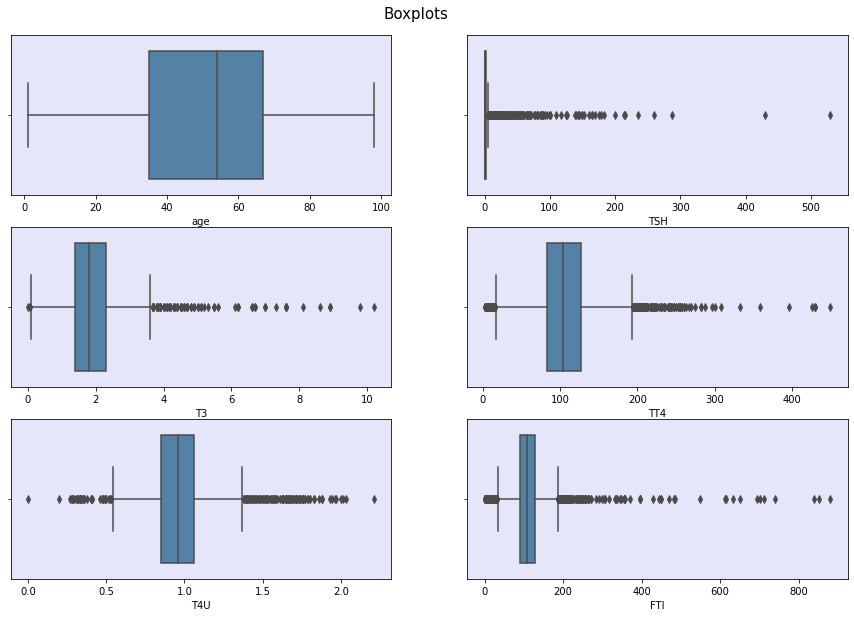

In [ ]:
# Boxplots
# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['age','TSH','T3','TT4','T4U','FTI']
colors = ['steelblue','steelblue','steelblue','steelblue','steelblue','steelblue']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 10))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'black')
for ax, data, column, color in zip(axes.flatten(), df, col_list, colors):
  sns.boxplot(df[column], ax = ax, color = color)
  ax.set_facecolor('lavender')

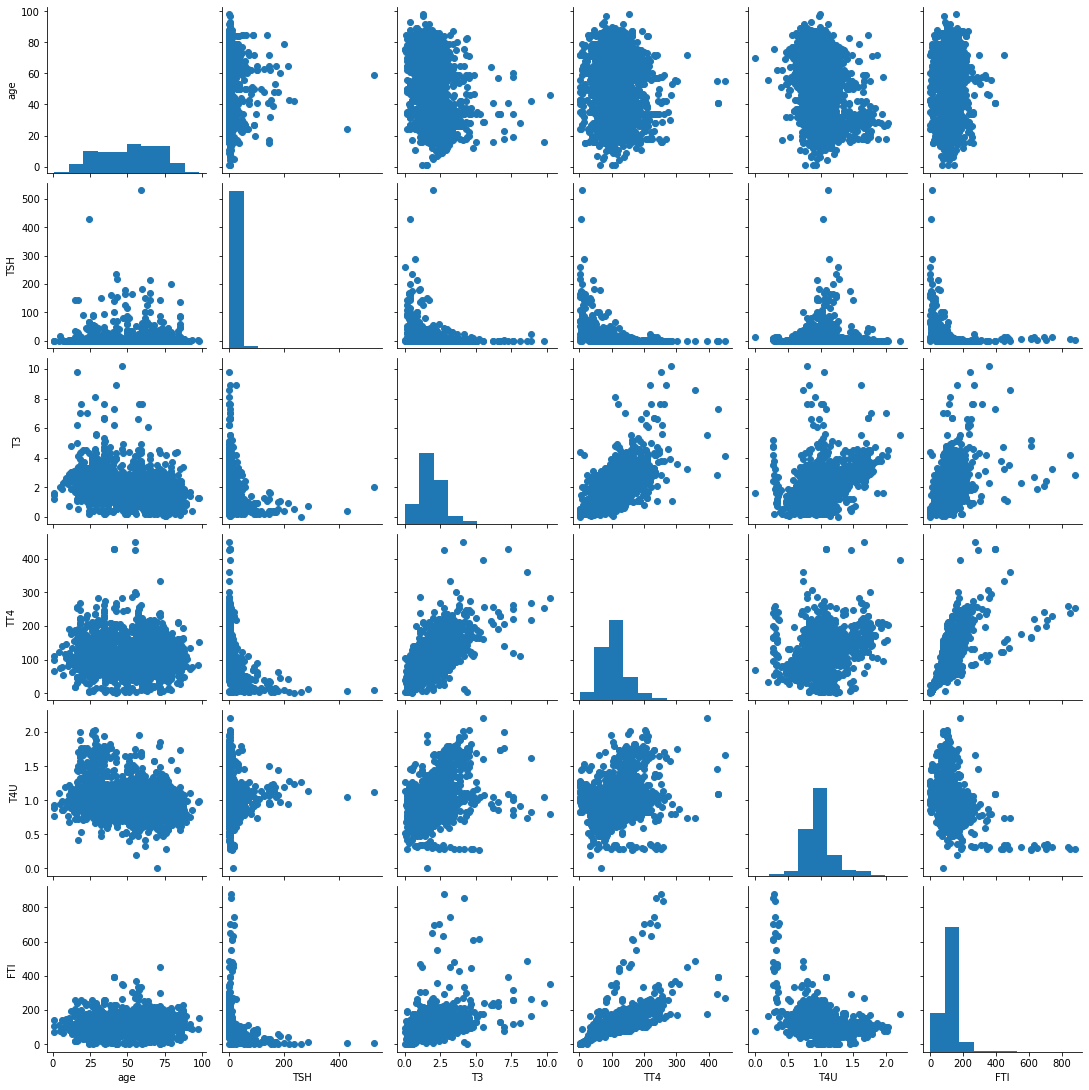

In [ ]:
g = sns.PairGrid(data = df, vars = ['age','TSH','T3','TT4','T4U','FTI'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [ ]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

<function matplotlib.pyplot.show>

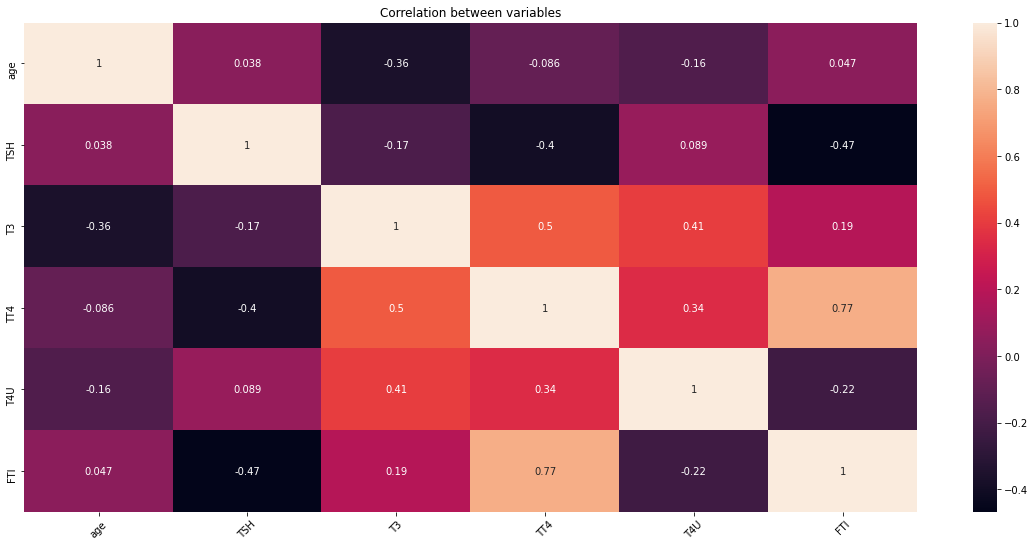

In [ ]:

#heatmap
#checking for correlation using spearman method
plt.figure(figsize=(20,9))
correlation_matrix=df.corr(method = 'spearman')
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot = True)
plt.xticks( rotation=45)
plt.title('Correlation between variables')
plt.show

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


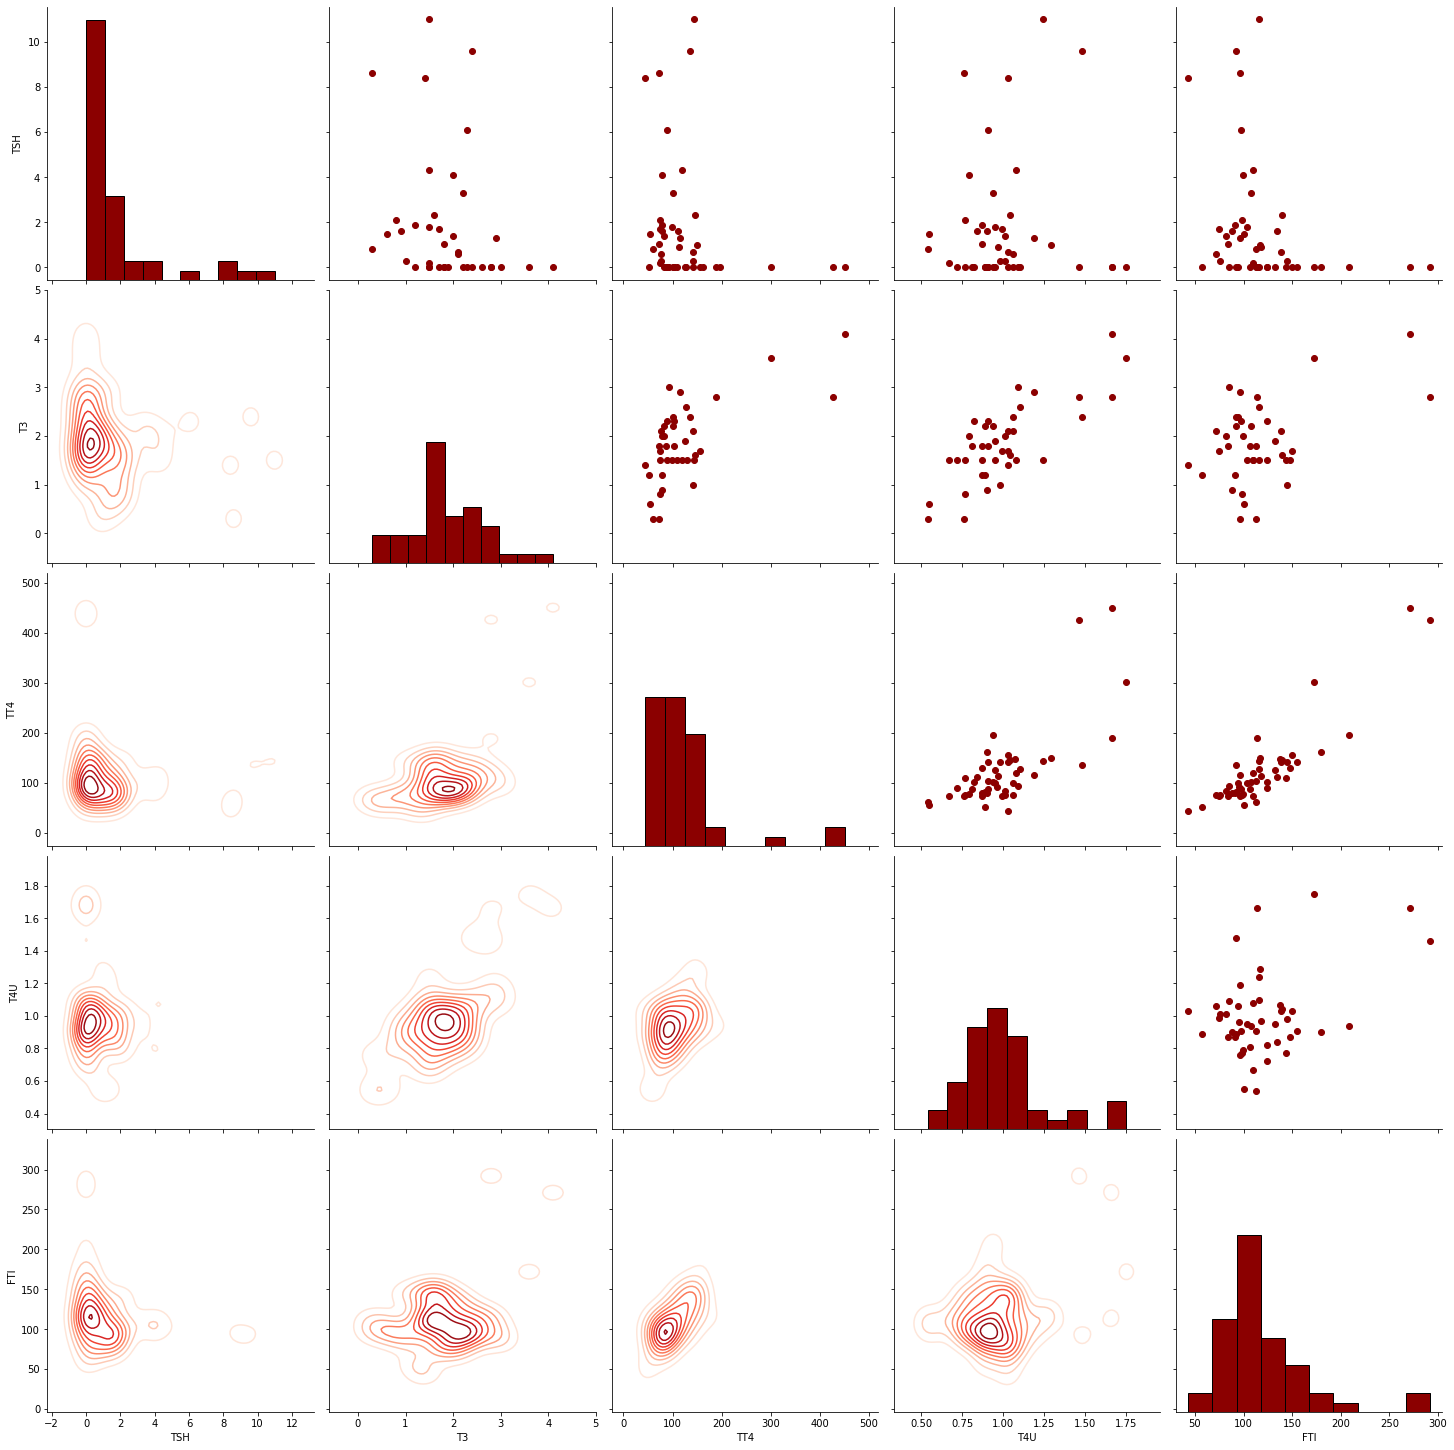

In [ ]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= df[df['age']==55],vars = ['TSH','T3','TT4','T4U','FTI'], size = 4)
# Map a scatter plot to the upper triangle
grid = grid.map_upper(plt.scatter, color = 'darkred')
# Mapping a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred',edgecolor = 'k')
# Mappping a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

## Observations from the univariate plots
> **1.Distribution**

nomarl distribution-T3,TT4, have an almost perfect nomarl distribution

multimodal distribution-T4U

unimodal distribution-TSH

> **2.Skewness**

'TSH','T3','TT4','T4U','FTI'- are right skewed

>**3.Correlation**

From the heatmap there is moderate corerelation between:
TSH-TT4-0.5
TT4-FTI-0.77

>**4.Outliers/Abnomality**

TSH','T3','TT4','T4U','FTI' have outliers but being a medical data it is considered sensitive





In [ ]:
#checking the shapes
x.shape,y.shape

((3086, 75), (3086, 1))

In [ ]:
#merging x and y
data_merged=pd.concat([x,y],axis=1)
data_merged.shape

(3086, 76)

In [ ]:
#checking for nulls after concatinating
data_merged.isna().sum()

age         438
TSH         455
T3          680
TT4         240
T4U         239
           ... 
TBG_8.50      0
TBG_80        0
TBG_86        0
TBG_9.30      0
status        0
Length: 76, dtype: int64

In [ ]:
#dropping nulls if any
data_merged.dropna(how='any', thresh=None, subset=None, inplace=True)

In [ ]:
#confirming for nulls after after dropping
data_merged.isna().sum()

age         0
TSH         0
T3          0
TT4         0
T4U         0
           ..
TBG_8.50    0
TBG_80      0
TBG_86      0
TBG_9.30    0
status      0
Length: 76, dtype: int64

<font color="green">*confirming the new data structure*</font>

In [ ]:
#previewing the top
data_merged.head()

,age,TSH,T3,TT4,T4U,FTI,sex_m,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,thyroid_surgery_t,query_hypothyroid_t,query_hyperthyroid_t,pregnant_t,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y,TBG_measured_y,TBG_108,TBG_11,TBG_110,TBG_12,TBG_122,TBG_13,TBG_14,TBG_15,TBG_16,TBG_17,TBG_18,TBG_19,TBG_20,TBG_21,TBG_22,TBG_23,TBG_24,TBG_25,TBG_26,TBG_27,TBG_28,TBG_29,TBG_3.10,TBG_30,TBG_31,TBG_32,TBG_33,TBG_34,TBG_35,TBG_36,TBG_37,TBG_38,TBG_39,TBG_40,TBG_41,TBG_43,TBG_45,TBG_47,TBG_48,TBG_50,TBG_52,TBG_53,TBG_63,TBG_65,TBG_69,TBG_7.30,TBG_8.40,TBG_8.50,TBG_80,TBG_86,TBG_9.30,status
0,72.0,30.0,0.6,15.0,1.48,10.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,145.0,1.7,19.0,1.13,17.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,24.0,0.0,0.2,4.0,1.00,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,24.0,430.0,0.4,6.0,1.04,6.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,77.0,7.3,1.2,57.0,1.28,44.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#creating a copy of the data
data=data_merged.copy()
data

,age,TSH,T3,TT4,T4U,FTI,sex_m,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,thyroid_surgery_t,query_hypothyroid_t,query_hyperthyroid_t,pregnant_t,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y,TBG_measured_y,TBG_108,TBG_11,TBG_110,TBG_12,TBG_122,TBG_13,TBG_14,TBG_15,TBG_16,TBG_17,TBG_18,TBG_19,TBG_20,TBG_21,TBG_22,TBG_23,TBG_24,TBG_25,TBG_26,TBG_27,TBG_28,TBG_29,TBG_3.10,TBG_30,TBG_31,TBG_32,TBG_33,TBG_34,TBG_35,TBG_36,TBG_37,TBG_38,TBG_39,TBG_40,TBG_41,TBG_43,TBG_45,TBG_47,TBG_48,TBG_50,TBG_52,TBG_53,TBG_63,TBG_65,TBG_69,TBG_7.30,TBG_8.40,TBG_8.50,TBG_80,TBG_86,TBG_9.30,status
0,72.0,30.0,0.6,15.0,1.48,10.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,145.0,1.7,19.0,1.13,17.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,24.0,0.0,0.2,4.0,1.00,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,24.0,430.0,0.4,6.0,1.04,6.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,77.0,7.3,1.2,57.0,1.28,44.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58.0,5.8,1.7,86.0,0.91,95.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3159,29.0,0.8,1.8,99.0,1.01,98.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3160,77.0,1.2,0.6,71.0,0.68,104.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3161,74.0,1.3,0.1,65.0,0.48,137.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#checking the records
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 0 to 3162
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          1958 non-null   float64
 1   TSH                          1958 non-null   float64
 2   T3                           1958 non-null   float64
 3   TT4                          1958 non-null   float64
 4   T4U                          1958 non-null   float64
 5   FTI                          1958 non-null   float64
 6   sex_m                        1958 non-null   uint8  
 7   on_thyroxine_t               1958 non-null   uint8  
 8   query_on_thyroxine_t         1958 non-null   uint8  
 9   on_antithyroid_medication_t  1958 non-null   uint8  
 10  thyroid_surgery_t            1958 non-null   uint8  
 11  query_hypothyroid_t          1958 non-null   uint8  
 12  query_hyperthyroid_t         1958 non-null   uint8  
 13  pregnant_t        

In [ ]:
#checking the unique values
data.nunique()

age          91
TSH         210
T3           62
TT4         240
T4U         145
           ... 
TBG_8.50      1
TBG_80        1
TBG_86        1
TBG_9.30      1
status        2
Length: 76, dtype: int64

In [ ]:
#checking the target
data['status']

0       0
1       0
2       0
3       0
4       0
       ..
3158    1
3159    1
3160    1
3161    1
3162    1
Name: status, Length: 1958, dtype: uint8

In [ ]:
data.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_m', 'on_thyroxine_t',
       'query_on_thyroxine_t', 'on_antithyroid_medication_t',
       'thyroid_surgery_t', 'query_hypothyroid_t', 'query_hyperthyroid_t',
       'pregnant_t', 'sick_t', 'tumor_t', 'lithium_t', 'goitre_t',
       'TSH_measured_y', 'T3_measured_y', 'TT4_measured_y', 'T4U_measured_y',
       'FTI_measured_y', 'TBG_measured_y', 'TBG_108', 'TBG_11', 'TBG_110',
       'TBG_12', 'TBG_122', 'TBG_13', 'TBG_14', 'TBG_15', 'TBG_16', 'TBG_17',
       'TBG_18', 'TBG_19', 'TBG_20', 'TBG_21', 'TBG_22', 'TBG_23', 'TBG_24',
       'TBG_25', 'TBG_26', 'TBG_27', 'TBG_28', 'TBG_29', 'TBG_3.10', 'TBG_30',
       'TBG_31', 'TBG_32', 'TBG_33', 'TBG_34', 'TBG_35', 'TBG_36', 'TBG_37',
       'TBG_38', 'TBG_39', 'TBG_40', 'TBG_41', 'TBG_43', 'TBG_45', 'TBG_47',
       'TBG_48', 'TBG_50', 'TBG_52', 'TBG_53', 'TBG_63', 'TBG_65', 'TBG_69',
       'TBG_7.30', 'TBG_8.40', 'TBG_8.50', 'TBG_80', 'TBG_86', 'TBG_9.30',
       'status'],
      dtyp

In [ ]:
#Selecting the target and features
test_features =['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_m', 'on_thyroxine_t',
       'query_on_thyroxine_t', 'on_antithyroid_medication_t',
       'thyroid_surgery_t', 'query_hypothyroid_t', 'query_hyperthyroid_t',
       'pregnant_t', 'sick_t', 'tumor_t', 'lithium_t', 'goitre_t',
       'TSH_measured_y', 'T3_measured_y', 'TT4_measured_y', 'T4U_measured_y',
       'FTI_measured_y', 'TBG_measured_y', 'TBG_108', 'TBG_11', 'TBG_110',
       'TBG_12', 'TBG_122', 'TBG_13', 'TBG_14', 'TBG_15', 'TBG_16', 'TBG_17',
       'TBG_18', 'TBG_19', 'TBG_20', 'TBG_21', 'TBG_22', 'TBG_23', 'TBG_24',
       'TBG_25', 'TBG_26', 'TBG_27', 'TBG_28', 'TBG_29', 'TBG_3.10', 'TBG_30',
       'TBG_31', 'TBG_32', 'TBG_33', 'TBG_34', 'TBG_35', 'TBG_36', 'TBG_37',
       'TBG_38', 'TBG_39', 'TBG_40', 'TBG_41', 'TBG_43', 'TBG_45', 'TBG_47',
       'TBG_48', 'TBG_50', 'TBG_52', 'TBG_53', 'TBG_63', 'TBG_65', 'TBG_69',
       'TBG_7.30', 'TBG_8.40', 'TBG_8.50', 'TBG_80', 'TBG_86', 'TBG_9.30']
X = data[test_features].values
y = data['status']
print("shape of X:",X.shape)
print("shape of y:",y.shape)


shape of X: (1958, 75)
shape of y: (1958,)


In [ ]:
from sklearn.model_selection import train_test_split
#splitting Dataset into Train and Test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

# 7. Implementing the Solution

>
>
<font color="steel blue">*SOLUTION 1: CLASSIFICATION MODEL WITH BOOSTED DECISION TREES*</font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#fitting the classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

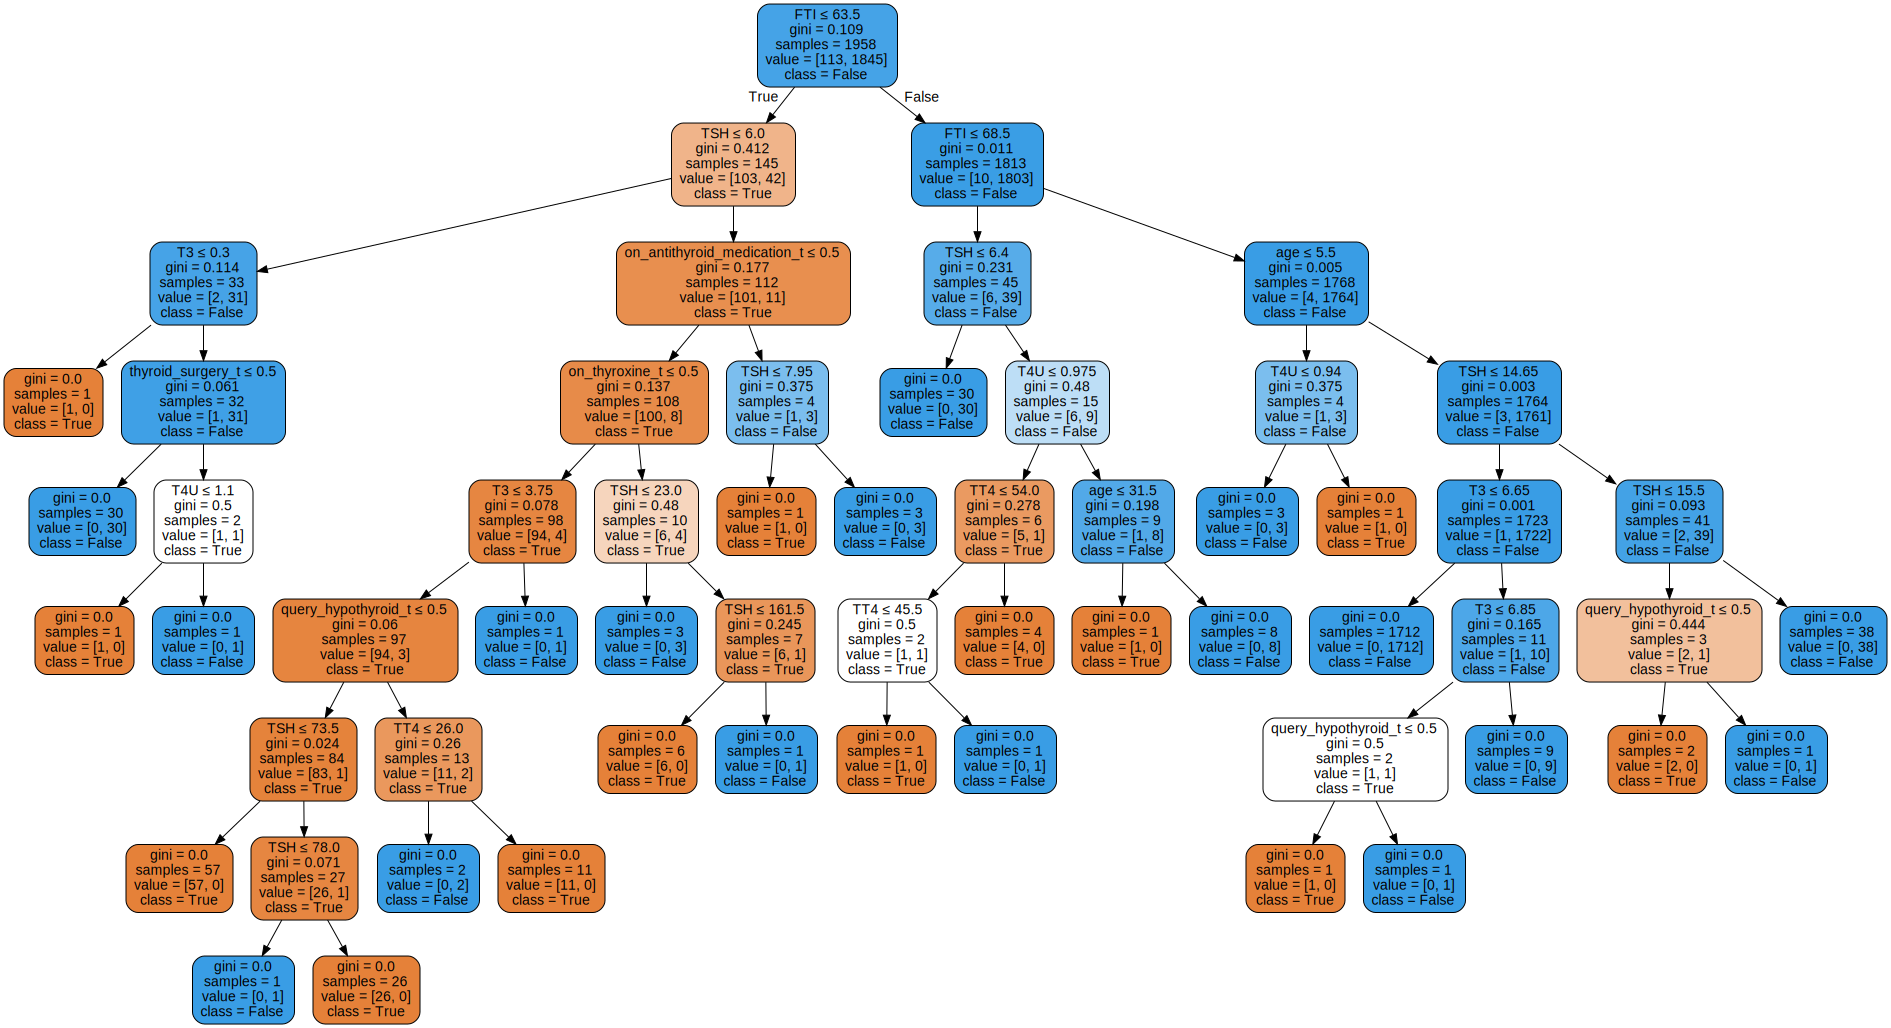

In [ ]:
#visualizing the tree
import matplotlib.pyplot as plt
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,feature_names = test_features,
                class_names=['True', 'False'],
                filled=True, rounded=True,
                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
# Predict based on the model we've trained
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
# Model Accuracy, checks how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


<font color="green">*Feature Importance.*</font>

In [ ]:
import matplotlib.pyplot as plt
#numerical feature importances
importance = clf.feature_importances_
# summarize feature importance
plt.figsize = (40, 8)
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01066
Feature: 1, Score: 0.23576
Feature: 2, Score: 0.02197
Feature: 3, Score: 0.02372
Feature: 4, Score: 0.02937
Feature: 5, Score: 0.63349
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.01099
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.01655
Feature: 10, Score: 0.00440
Feature: 11, Score: 0.01309
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

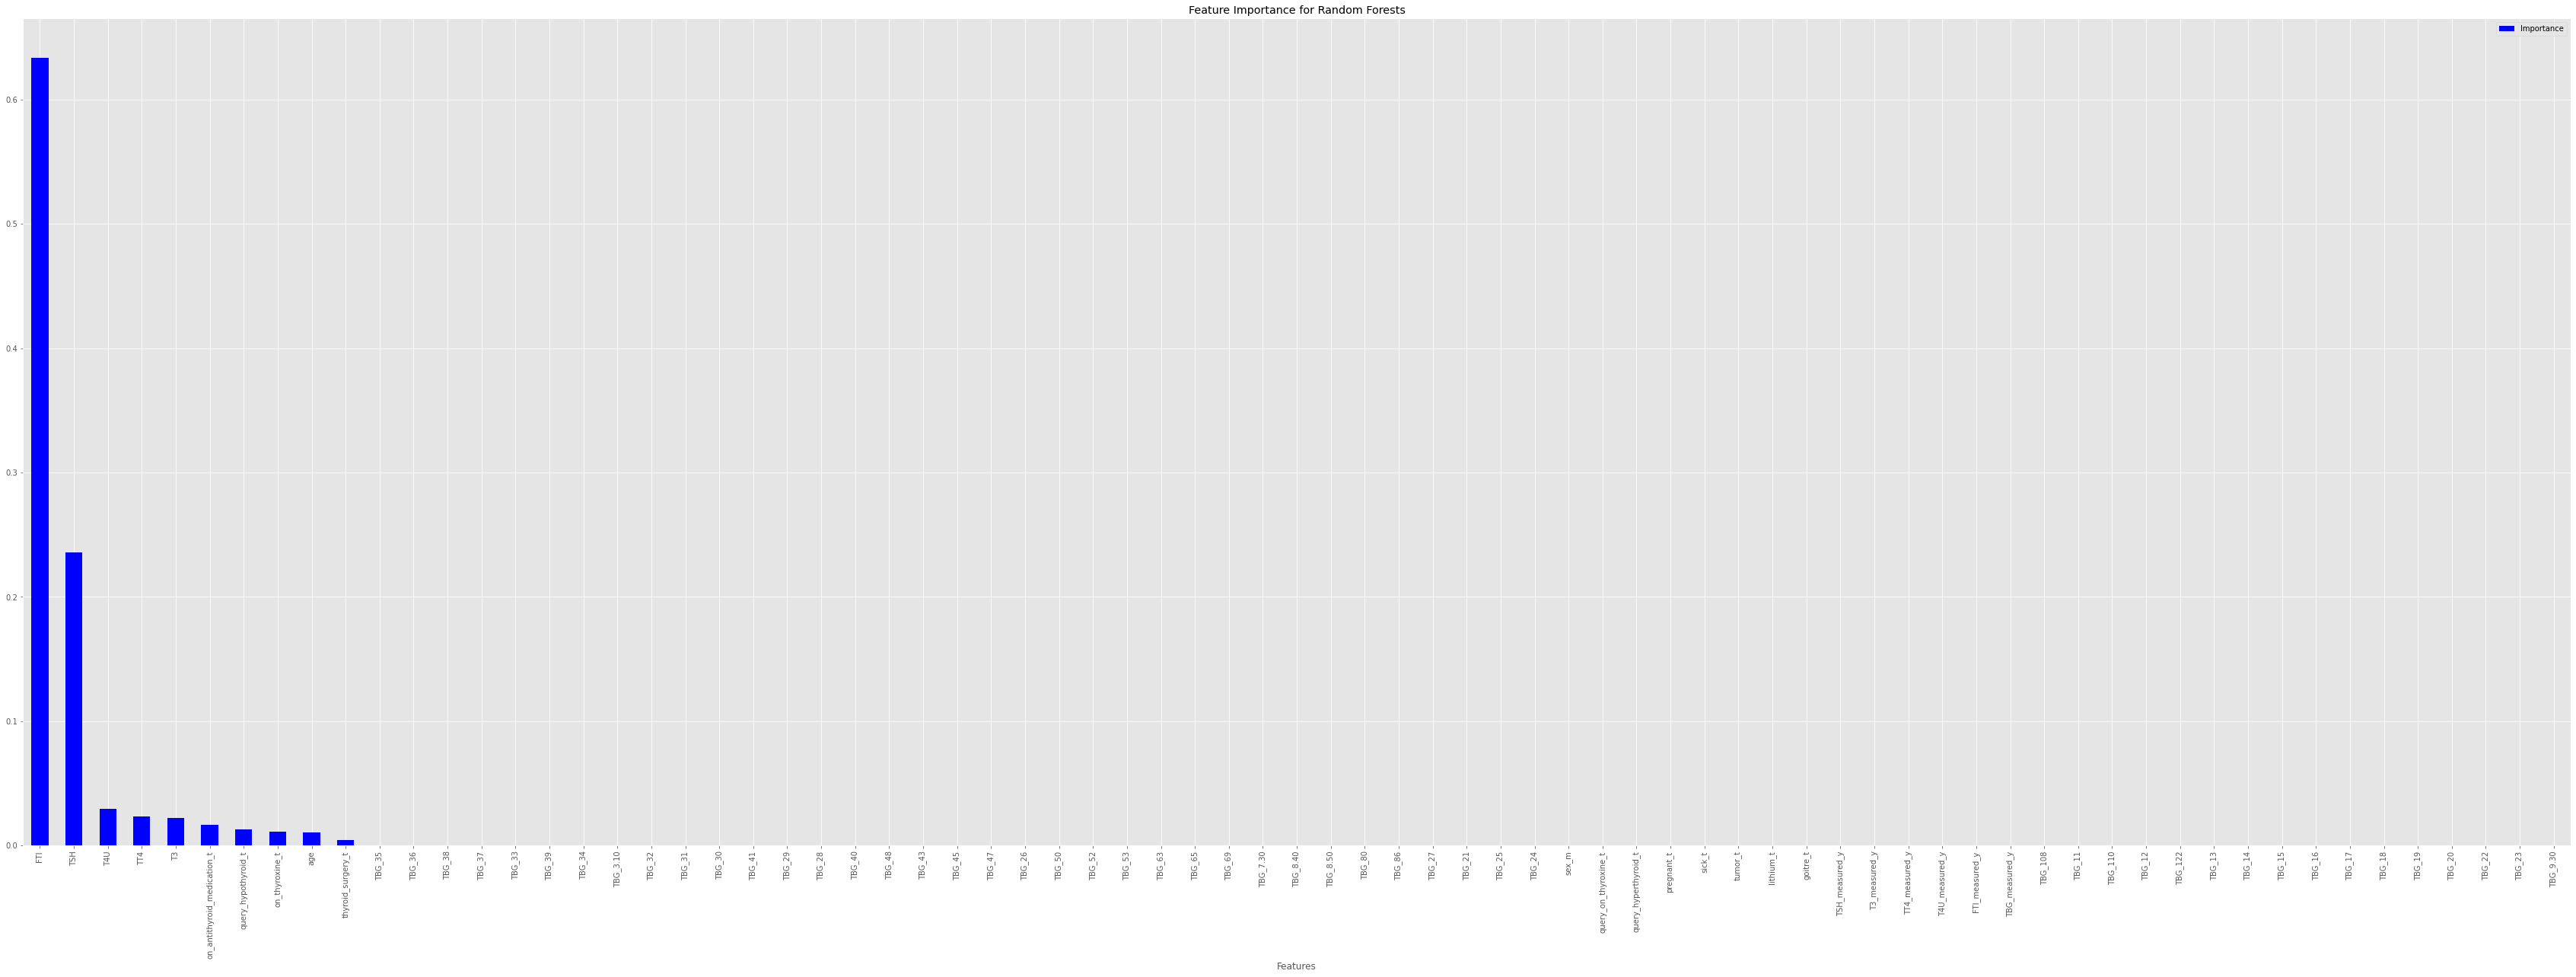

In [ ]:
# Set the style to `ggplot`
plt.style.use("ggplot")
# Getting the feature importance
pd.DataFrame({'Features' :test_features, 'Importance' : clf.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Feature Importance for Random Forests',figsize = (60, 20), color = 'blue')
plt.show()


<font color="green">*REPEATING WITH BOOSTED DECISION TREES*</font>

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier,GradientBoostingClassifier

In [ ]:
#model ensemble
models = [
    RandomForestClassifier(random_state=0),
    AdaBoostClassifier(random_state=0),
    GradientBoostingClassifier(random_state=0)
]

In [ ]:
#spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#fitting the models
#creating objects for test and train scores
Train_Scores = "Train accuracy"
Test_Scores = "Test accuracy"
#function to evaluate the models
def evaluate_models(models, model_names=None):
    if not model_names:
        model_names = [type(model).__name__ for model in models]    
    scores = pd.DataFrame(index=[Train_Scores, Test_Scores])
    #for loop to iterate over the models
    for model, model_name in zip(models, model_names):
      #fitting the models
        model.fit(X_train, y_train)
        scores.at[Train_Scores, model_name] = \
            model.score(X_train, y_train)
        scores.at[Test_Scores, model_name] = \
            model.score(X_test, y_test)
    return scores
evaluate_models(models)


,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
Train accuracy,1.000000,0.996350,0.998540
Test accuracy,0.989796,0.989796,0.994898


In [ ]:
#checking the prediction
y_test

405     1
574     1
1566    1
593     1
1831    1
       ..
1585    1
2758    1
2359    1
2305    1
2748    1
Name: status, Length: 588, dtype: uint8

In [ ]:
#Solution with Grid Search Technique
#searching for the best parameters
from sklearn.model_selection import GridSearchCV

number_folds = 5

gradient_boosting_params = {
    "n_estimators": [152],
    "learning_rate": [0.1],
    "max_depth": [4, 6, 8, 10],
    "subsample": [0.4, 0.6, 0.8, 1.0],
    "max_features": [0.5, 0.75, 1.0]
}
#boosting the model
boost_model = models[1]
boost_model = GridSearchCV(
    estimator=GradientBoostingClassifier(
        random_state=0
    ),
    param_grid=gradient_boosting_params,
    cv=number_folds
)
boost_model.fit(X_train, y_train)
predictions = boost_model.predict(X_test)

In [ ]:
#checking the boosted model predictions using Grid_search technique
len(predictions)

588

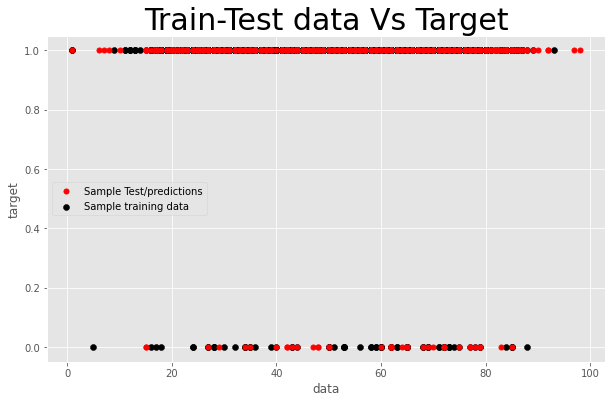

In [ ]:
#Scatterplot visualization of predictions
# Plot the results
plt.figure(figsize=(10,6))
plt.scatter(X_train[:,0:1], y_train, c="k", label="Sample training data")
plt.plot(X_test[:,0:1], predictions[0:588], c="r", label="Sample Test/predictions",linewidth=2,ls="none", marker='.', ms=10)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Train-Test data Vs Target",fontsize=(30))
plt.legend()
plt.show()

In [ ]:
#Accuracy report for the model 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        37
           1       1.00      1.00      1.00       551

    accuracy                           0.99       588
   macro avg       0.98      0.97      0.98       588
weighted avg       0.99      0.99      0.99       588




<font color="steel blue">*SOLUTION 2 : CLASSIFICATION MODEL WITH SUPPORT VECTOR MACHINES*</font>

shape of X: (1958, 2)
shape of Y: (1958,)
------RADIAL KERNEL MODEL-----


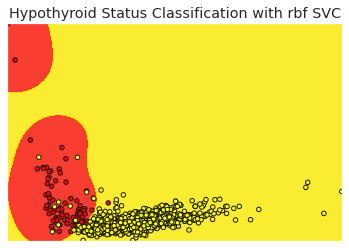

The Radial kernel model accuracy_score:  0.9829931972789115
The Radial kernel model confusion_matrix: 
[[ 31   5]
 [  5 547]]
------SIGMOID KERNEL MODEL-----


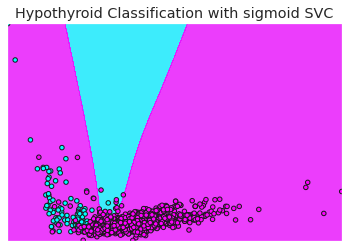

The Sigmoid kernel model accuracy_score:  0.9047619047619048
TheSigmoid kernel model confusion_matrix: 
[[  0  36]
 [ 20 532]]
------POLYNOMIAL KERNEL MODEL-----(Be patient it takes the most time)


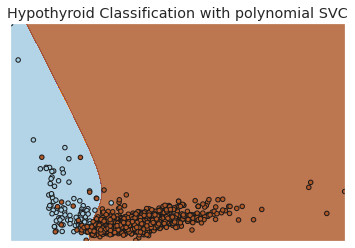

The poly kernel model accuracy_score:  0.9846938775510204
The poly kernel model confusion_matrix: 
[[ 25   3]
 [  3 361]]


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
#Fitting the models
# the reduction PCA
pca = PCA(n_components=2).fit(data)
X = pca.transform(data)
X.shape,y.shape
print("shape of X:",X.shape)
print("shape of Y:",y.shape)
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
print("------RADIAL KERNEL MODEL-----")
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)
# mesh grid the graph
def make_meshgrid(x, y, h=.05):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# createing the hyperplanes 
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Status Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1,h=.5)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()
# making prediction
y_pred = rbfclassifier.predict(X_test)
# Model Evaluation
print("The Radial kernel model accuracy_score: ",accuracy_score(y_test, y_pred))
print("The Radial kernel model confusion_matrix: ")
#
#
#
print(confusion_matrix(y_test, y_pred))
print("------SIGMOID KERNEL MODEL-----")
## SIGMOID
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
#using the training set
sigclassifier.fit(X_train, y_train)
# mesh grid for the graph
def make_meshgrid(x, y, h=.5):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

#creating the hyperplanes
def plot_contours(ax, clf, xx, yy, **params):
    Z = sigclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with sigmoid SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1,h=.5)

plot_contours(ax, sigclassifier, xx, yy, cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.cool, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()
# making prediction
y_pred = sigclassifier.predict(X_test)
# Model Evaluation
print("The Sigmoid kernel model accuracy_score: ",accuracy_score(y_test, y_pred))
#
#
#
print("TheSigmoid kernel model confusion_matrix: ")
print(confusion_matrix(y_test, y_pred))

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("------POLYNOMIAL KERNEL MODEL-----(Be patient it takes the most time)")
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)
#mesh grid for the graph
def make_meshgrid(x, y, h=.5):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()
# making prediction
y_pred = polyclassifier.predict(X_test)
# Model Evaluation
print("The poly kernel model accuracy_score: ",accuracy_score(y_test, y_pred))
print("The poly kernel model confusion_matrix: ")
#
#
#
print(confusion_matrix(y_test, y_pred))

REPEATING THE SVM MODEL WITH PARAMETER TUNING

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.svm
import sklearn.metrics
import sklearn.pipeline
#list of SVM kernels
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
#This function selects and returns the corresponding SVC model using nested if statement
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")
    for i in range(4):
    # Separate data into test and training sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# Train a SVC model using different kernal
        svclassifier = getClassifier(i) 
        svclassifier.fit(X_train, y_train)
# Make prediction
        y_pred = svclassifier.predict(X_test)
# Evaluate our model
        print("Evaluation:", kernels[i], "kernel")
        print(classification_report(y_test,y_pred))

In [ ]:
# Perform a grid search to find the best hyperparameters
def grid_search(X, y):
    # Create a pipeline
    clf_pipeline = sklearn.pipeline.Pipeline([
        ('m', sklearn.svm.LinearSVC(loss='squared_hinge', tol=0.0001, multi_class='ovr', dual=False, class_weight=None, verbose=0, random_state=None, max_iter=10000))
        ])
    # Set parameters (name in pipeline + name of parameter)
    parameters = { 
        'm__penalty': ('l1', 'l2'), 
        'm__C': (0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0), 
        'm__fit_intercept': (False, True),
        'm__intercept_scaling': (0.5, 1, 2),
         }
    # Create a grid search classifier
    gs_classifier = sklearn.model_selection.GridSearchCV(clf_pipeline, parameters, cv=10, iid=False, n_jobs=2, scoring='accuracy', verbose=1)
    
    print("Warning: Starting a grid search (it takes lots of time:your patience required)")
    gs_classifier = gs_classifier.fit(X, y)

    # Print results
    print('---- Results ----')
    print('Best score: ' + str(gs_classifier.best_score_))
    for name in sorted(parameters.keys()):
        print('{0}: {1}'.format(name, gs_classifier.best_params_[name]))
# Predict and evaluate on test data
def train_and_evaluate(X, y):
    rbfclassifier = SVC(kernel='rbf')
    # Training the model using the training set
    rbfclassifier.fit(X, y)
    predictions = rbfclassifier.predict(X)
    # Print results
    print('\n---- Results ----')
    accuracy = sklearn.metrics.accuracy_score(y, predictions)
    print('\nAccuracy: {0:.2f}'.format(accuracy * 100.0))
    print('\nClassification Report:')
    print(sklearn.metrics.classification_report(y, predictions))
    print('Confusion Matrix:')
    print(sklearn.metrics.confusion_matrix(y, predictions))

In [ ]:
def main():
   # checks for the class imbalance
    print('\n--- Class balance ---\n')
    print(np.unique(y_train, return_counts=True))
    print(np.unique(y_test, return_counts=True))
    # Perform a grid search
    grid_search(X, y)
    # Train and evaluate
    train_and_evaluate(X_train, y_train)
    # Predict on test set
    #predict_and_evaluate(X_test, y_test)
# entry point for the main method
if __name__ == "__main__": main()


--- Class balance ---

(array([0, 1], dtype=uint8), array([  85, 1481]))
(array([0, 1], dtype=uint8), array([ 28, 364]))
Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 778 tasks      | elapsed:    3.5s


---- Results ----
Best score: 0.9749607535321821
m__C: 0.4
m__fit_intercept: True
m__intercept_scaling: 2
m__penalty: l2

---- Results ----

Accuracy: 97.89

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        85
           1       0.99      0.99      0.99      1481

    accuracy                           0.98      1566
   macro avg       0.92      0.87      0.89      1566
weighted avg       0.98      0.98      0.98      1566

Confusion Matrix:
[[  63   22]
 [  11 1470]]


[Parallel(n_jobs=2)]: Done 1080 out of 1080 | elapsed:    4.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


## 8. Challenging the solution

> The models performance for both decision trees and Support Vector Machines was above 95%.This is an indication of overfitting.

                        Test accuracy
Boosted Decision Tree:98.98	

RandomForestClassifier: 98.98

AdaBoostClassifier: 99.49


SVM

    accuracy                           0.98       

**Causes of overfitting**

This was due to imbalanced classes as detected in the SVM:

--- Class balance ---

(array([0, 1], dtype=uint8), array([  85, 1481]))

(array([0, 1], dtype=uint8), array([ 28, 364]))


**consider class imbalance techniques such as SMOTE**







## 9. Follow up questions

### a). Did we have the right data?

**NO: There was class imbalance**

### b). Do we need other data to answer our question?
**Yes: Data with balanced classes**

### c). Did we have the right question?
**Yes**
